In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
#establishes local path for exoplanet dataset
data_path = "NASAExoplanetsFull.csv"
df = pd.read_csv(data_path)
df.head()

C:\Users\bhatt\AppData\Local\Temp\ipykernel_36340\245783666.py:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec,can_live
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,2011-08,7/23/2014,2,1,2,0,0,0,0,0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,2008-01,5/14/2014,2,1,2,0,0,0,0,0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,...,2023-08,9/19/2023,2,1,2,0,0,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,2017-03,9/6/2018,0,1,1,0,0,0,0,0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,2011-08,7/23/2014,0,1,1,0,0,0,0,0


In [3]:
#see how many instances and how many features
print(df.shape)

(36557, 289)


In [4]:
#what are the features?
print(df.columns)

Index(['rowid', 'pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name',
       'tic_id', 'gaia_id', 'default_flag', 'sy_snum',
       ...
       'pl_pubdate', 'releasedate', 'pl_nnotes', 'st_nphot', 'st_nrvc',
       'st_nspec', 'pl_nespec', 'pl_ntranspec', 'pl_ndispec', 'can_live'],
      dtype='object', length=289)


In [5]:
#remove the irrelevant columns
irrelevant_columns = ['rowid', 'pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name', 'tic_id', 'gaia_id', 'pl_refname']
df.drop(columns=irrelevant_columns, inplace=True, errors='ignore')

In [6]:
#edits the datafram to remove all rows which have values N/A for the target feature (can_live)
df = df[df["can_live"].notna()]

In [7]:
#helps in preprocessing categorical
le = LabelEncoder()
df["can_live"] = le.fit_transform

In [8]:
#identify what columns need categorization
categorical_columns = df.select_dtypes(include=['object']).columns
print('can_live' in df.columns)

True


In [9]:
#converts categorical data into dummy values (does one-hot encoding, multiple columns, and dropping first column)
#GETS RID OF MULTICOLLINEARITY
df = pd.get_dummies(df, columns=categorical_columns, drop_first=False)
print('can_live' in df.columns)

False


In [10]:
#solve the issue of missing data
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [11]:
#PREPARE FOR MODELS!
X = df

temp = pd.read_csv(data_path)
y = temp["can_live"]

C:\Users\bhatt\AppData\Local\Temp\ipykernel_36340\3663980248.py:4: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(data_path)


In [12]:
#Scales data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [13]:
#look at x values
print(X.columns.tolist())

['default_flag', 'sy_snum', 'sy_pnum', 'sy_mnum', 'cb_flag', 'disc_year', 'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag', 'ast_flag', 'obm_flag', 'micro_flag', 'etv_flag', 'ima_flag', 'dkin_flag', 'pl_controv_flag', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_masselim', 'pl_massj', 'pl_massjerr1', 'pl_massjerr2', 'pl_massjlim', 'pl_msinie', 'pl_msinieerr1', 'pl_msinieerr2', 'pl_msinielim', 'pl_msinij', 'pl_msinijerr1', 'pl_msinijerr2', 'pl_msinijlim', 'pl_cmasse', 'pl_cmasseerr1', 'pl_cmasseerr2', 'pl_cmasselim', 'pl_cmassj', 'pl_cmassjerr1', 'pl_cmassjerr2', 'pl_cmassjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_den

C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - accuracy: 0.9972 - loss: 0.5948 - val_accuracy: 0.9984 - val_loss: 0.3665
Epoch 2/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9972 - loss: 0.3202 - val_accuracy: 0.9984 - val_loss: 0.2084
Epoch 3/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9972 - loss: 0.1863 - val_accuracy: 0.9984 - val_loss: 0.1272
Epoch 4/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9977 - loss: 0.1157 - val_accuracy: 0.9984 - val_loss: 0.0823
Epoch 5/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9974 - loss: 0.0771 - val_accuracy: 0.9984 - val_loss: 0.0558
Epoch 6/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9977 - loss: 0.0531 - val_accuracy: 0.9984 - val_loss: 0.0395
Epoch 7/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9976 - loss: 0.0393 - val_accuracy: 0.9984 - val_loss: 0.0293
Epoch 8/50
914/914 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9975 - loss: 0.0307 - 

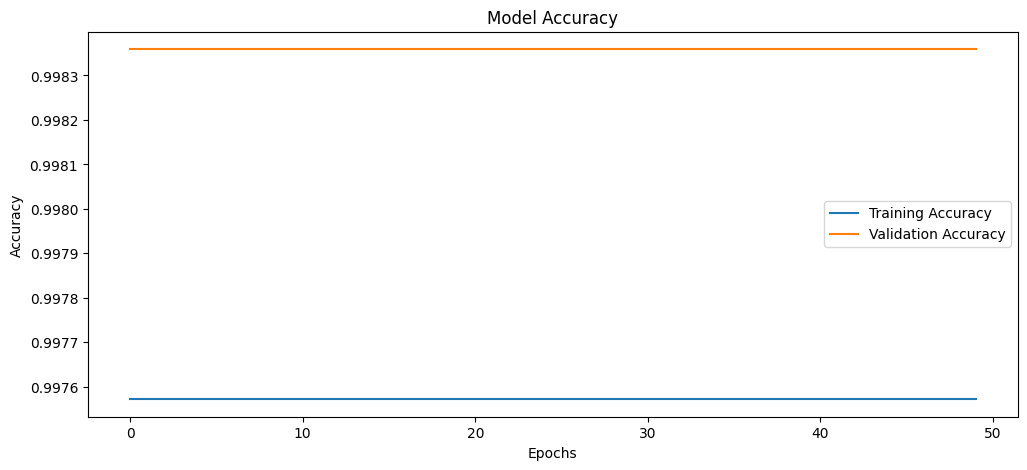

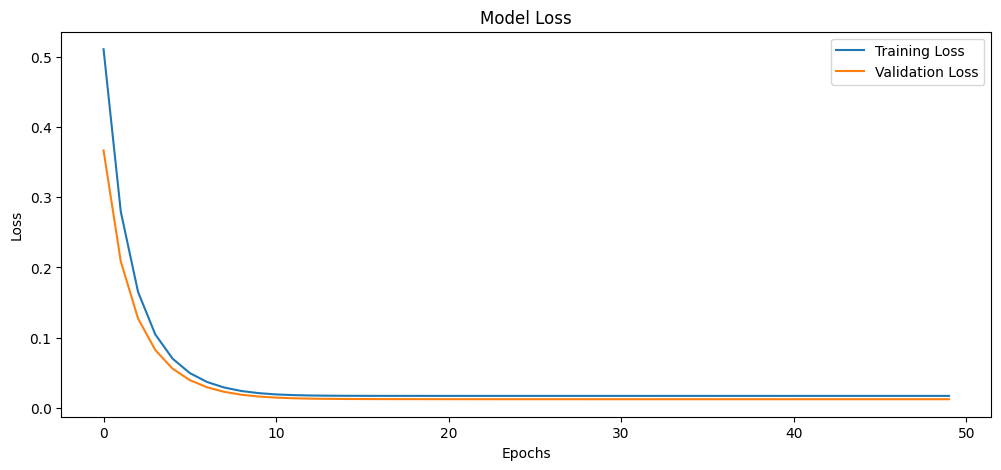

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7300
           1       0.00      0.00      0.00        12

    accuracy                           1.00      7312
   macro avg       0.50      0.50      0.50      7312
weighted avg       1.00      1.00      1.00      7312



C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)


eval_result = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {eval_result[1]:.4f}")


plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

predictions = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, predictions))
